In [1]:
import pandas as pd      #IMPORTANTE NO OLVIDAR ヽ(•‿ •)ノ
import numpy as np
pd.set_option("display.max_rows", 9) # Especificar el número de filas a mostrar
from scipy import stats # importando scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt # importando matplotlib
from matplotlib.ticker import NullFormatter
import seaborn as sns # importando seaborn
import calendar
plt.style.use('seaborn-whitegrid') # Se define el estilo, en este caso se elige la visualización clásica de Matlab

# PCA RECURSOS

1. Abrir el archivo
2. Separar las variables dependientes de las independientes (RECURSOS) y normalizarlas
3. Construcción de las matrices de varianza y covarianza
4. Cálculo de los valores propios
5. PCA

In [2]:
#Se importan las librerias necesarias
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

1.Abrir el archivo

In [3]:
#Se cargan los archivos limpios sin variables respetidas, imputados los datos y sin atípicos

total=pd.read_excel("TOTALULIMPIO2.xlsx",index_col=0) #Recursos:amarillo #Capacidades:rojo #Resultados:azul
total

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
0,145898,11,1810,2008,1.665038,2.000000,5.370346,2.000000,2.2875,10.0,...,641984.0,3525900,3525900,343423.189677,79.846659,912761,2602400.0,5.155038e+06,4.996960e+06,3460300.0
1,145904,11,1810,2008,2.000000,7.000000,5.370346,12.562613,2.2875,3.0,...,201817.0,296411,296411,9406.000000,79.846659,122106,102941.0,5.155038e+06,4.996960e+06,296411.0
2,145912,11,1810,2008,1.665038,46.562075,5.370346,1.000000,2.2875,30.0,...,143460.0,1594496,1594496,3200.000000,46.000000,366562,867491.0,5.155038e+06,1.946210e+05,1597520.0
3,145913,11,1741,2008,1.000000,46.562075,5.370346,2.000000,2.2875,3.0,...,8704.0,166200,166200,-2000.000000,79.846659,92868,26720.0,5.155038e+06,4.996960e+06,231480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,987459,8,1410,2016,2.000000,46.562075,3.000000,12.562613,2.2875,27.0,...,188741.0,1290356,1290356,11182.000000,54.000000,790408,618268.0,5.155038e+06,4.996960e+06,1100444.0
11636,987465,8,1410,2016,1.665038,40.000000,2.000000,12.562613,2.2875,29.0,...,465071.0,3679414,3679414,343423.189677,8.000000,1476328,2164604.0,5.155038e+06,4.996960e+06,3300208.0
11637,987467,8,1410,2016,1.665038,36.000000,12.000000,9.000000,2.2875,260.0,...,2874293.0,15549225,15550083,503083.000000,400.000000,7454626,6940062.0,5.155038e+06,1.608454e+06,15443532.0
11638,987483,8,1410,2016,1.000000,3.000000,2.000000,12.562613,2.2875,11.0,...,300842.0,1284882,1284882,343423.189677,18.000000,835716,421689.0,5.155038e+06,1.717450e+05,1180126.0


2.Separar las variables dependientes de las independientes (RECURSOS) y normalizarlas

In [4]:
variables = ['INV_MP','INV_PP','INV_PT','INV_PTNOFAB','TOTALINV','MPCOMPRADA','PROD_BRUTA','PROD_INDUST','INVER_TERRENO',
            'INVER_EDIF','INVER_MAQ','INVER_OFICINA','INVER_EQTRANSP','TOTALINVER','VAL_TERRENO','VAL_EDIF','VAL_MAQ',
            'VAL_OFICINA','VAL_EQTRANSP','VALORACTIVOS','INVERBRUTA','GASTOSCARTERA','SEGUROS','VENTAS']
# Separando los Recursos (Varibles independientes)
X=total.loc[:,variables].values 
# Separando el objetivo que es ventas (Variable dependiente)
y=total.loc [:, ['VENTAS']].values 
x_std= StandardScaler().fit_transform(X)

In [5]:
recursos = pd.DataFrame(data = X, columns = variables).head(10295)
recursos

,INV_MP,INV_PP,INV_PT,INV_PTNOFAB,TOTALINV,MPCOMPRADA,PROD_BRUTA,PROD_INDUST,INVER_TERRENO,INVER_EDIF,...,VAL_TERRENO,VAL_EDIF,VAL_MAQ,VAL_OFICINA,VAL_EQTRANSP,VALORACTIVOS,INVERBRUTA,GASTOSCARTERA,SEGUROS,VENTAS
0,2.700570e+05,751881.4899,8.695000e+04,852834.702155,357007.0,2602400.0,3525900.0,3525900.0,560033.398417,686757.843923,...,1.861905e+06,1.484530e+05,173535.0,86400.0,197796.000000,641984.0,343423.189677,8.969314e+06,43511.436095,3460300.0
1,8.872281e+05,751881.4899,1.245539e+06,31565.000000,31565.0,102941.0,296411.0,296411.0,560033.398417,10920.000000,...,1.861905e+06,1.055540e+05,40547.0,10556.0,39638.000000,201817.0,9406.000000,8.969314e+06,4535.000000,296411.0
2,8.872281e+05,751881.4899,7.972300e+04,852834.702155,79723.0,867491.0,1594496.0,1594496.0,560033.398417,686757.843923,...,1.861905e+06,2.269648e+06,134041.0,3200.0,132514.502622,143460.0,3200.000000,8.969314e+06,993.000000,1597520.0
3,4.000200e+04,751881.4899,7.102000e+04,852834.702155,111022.0,26720.0,166200.0,166200.0,560033.398417,686757.843923,...,1.861905e+06,2.269648e+06,7700.0,500.0,132514.502622,8704.0,-2000.000000,8.969314e+06,43511.436095,231480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,1.477983e+06,751881.4899,1.435000e+04,852834.702155,1492333.0,618268.0,1290356.0,1290356.0,560033.398417,686757.843923,...,1.861905e+06,2.269648e+06,163917.0,6425.0,132514.502622,188741.0,11182.000000,8.969314e+06,10847.000000,1100444.0
10292,8.872281e+05,751881.4899,5.510530e+05,852834.702155,551053.0,2164604.0,3679414.0,3679414.0,560033.398417,686757.843923,...,1.861905e+06,2.000000e+05,93843.0,14789.0,151500.000000,465071.0,343423.189677,8.969314e+06,4900.000000,3300208.0
10293,7.329380e+05,79984.0000,9.949920e+05,15865.000000,1823779.0,6940062.0,15549225.0,15550083.0,560033.398417,246000.000000,...,1.861905e+06,2.460000e+05,2049837.0,207837.0,159674.000000,2874293.0,503083.000000,2.444700e+04,34127.000000,15443532.0
10294,8.911900e+04,751881.4899,1.245539e+06,852834.702155,89119.0,421689.0,1284882.0,1284882.0,560033.398417,686757.843923,...,1.861905e+06,3.052600e+04,61378.0,80619.0,84752.000000,300842.0,343423.189677,8.969314e+06,3149.000000,1180126.0


In [6]:
#No hay datos perdidos pues se esta utilizando el archivo de los datos limpios

recursos.isnull().sum() # Saber si hay casos con NA
recursos.dropna(how="all", inplace=True) # Eliminar las observaciones con NA
recursos.columns

Index(['INV_MP', 'INV_PP', 'INV_PT', 'INV_PTNOFAB', 'TOTALINV', 'MPCOMPRADA',
       'PROD_BRUTA', 'PROD_INDUST', 'INVER_TERRENO', 'INVER_EDIF', 'INVER_MAQ',
       'INVER_OFICINA', 'INVER_EQTRANSP', 'TOTALINVER', 'VAL_TERRENO',
       'VAL_EDIF', 'VAL_MAQ', 'VAL_OFICINA', 'VAL_EQTRANSP', 'VALORACTIVOS',
       'INVERBRUTA', 'GASTOSCARTERA', 'SEGUROS', 'VENTAS'],
      dtype='object')

In [7]:
#Se elimina la variable ventas pues X=VARIABLES INDEPENDIENTES=Recursos
x=recursos.drop("VENTAS",axis = 1)

y=recursos["VENTAS"]  #Y=VARIABLE DEPENDIENTE= Ventas
names=recursos.columns
X_std= StandardScaler().fit_transform(x) #Normalizando

<Figure size 432x288 with 0 Axes>

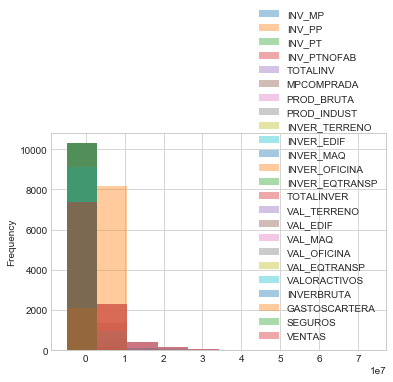

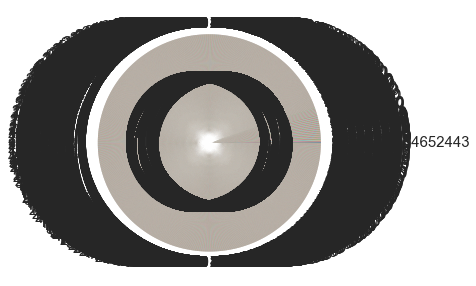

In [61]:
plt.figure("Histograma")
recursos.plot.hist(alpha=0.4)
plt.figure("Gráfico de pie",figsize=(5,5))
recursos.VENTAS.value_counts().plot(kind="pie",autopct='%1.1f%%', fontsize=15)
plt.show()

3.Construcción de las matrices de varianza y covarianza

Para que se pueda realizar el PCA, es necesario que las variables presenten factores comunes. Es decir, que estén muy correlacionadas entre sí. Los coeficientes de la matriz de correlaciones deben ser grandes en valor absoluto.

In [8]:
# Matriz de covarianza

mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)

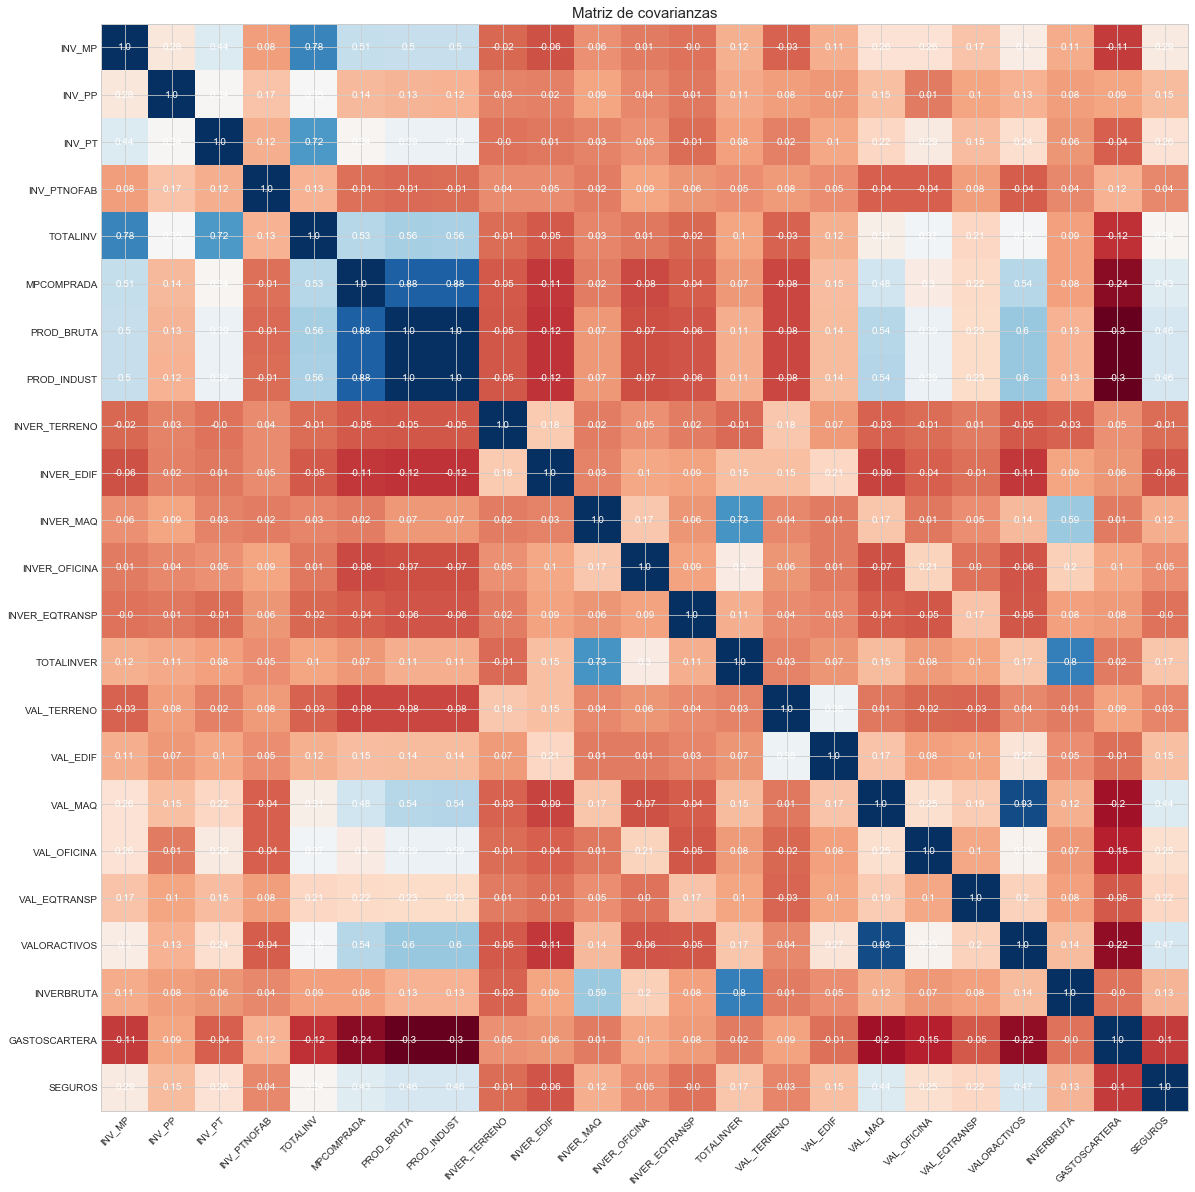

In [9]:
#Gráficar en un mapa de calor las covarianzas

corMat=np.asarray(cov_mat)

fig, ax = plt.subplots(figsize=(20,20))#Figsize para aumentar el tamaño
im = ax.imshow(corMat,cmap="RdBu")

# Mostrar las etiquetas de las variables
ax.set_xticks(np.arange(len(names)-1))
ax.set_yticks(np.arange(len(names)-1))
# Asignar los nombres a las etiquetas
ax.set_xticklabels(names[:33])
ax.set_yticklabels(names[:33])

# Rotar los nombres
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop para asignar los valores de las correlaciones en el mapa de calor
for i in range(len(names)-1):
    for j in range(len(names)-1):
        text = ax.text(j, i, round(corMat[i, j],2),
                       ha="center", va="center", color="w")

plt.title("Matriz de covarianzas", fontdict={"fontsize":15}) 
# o de correlación si los datos están normalizados
plt.show()

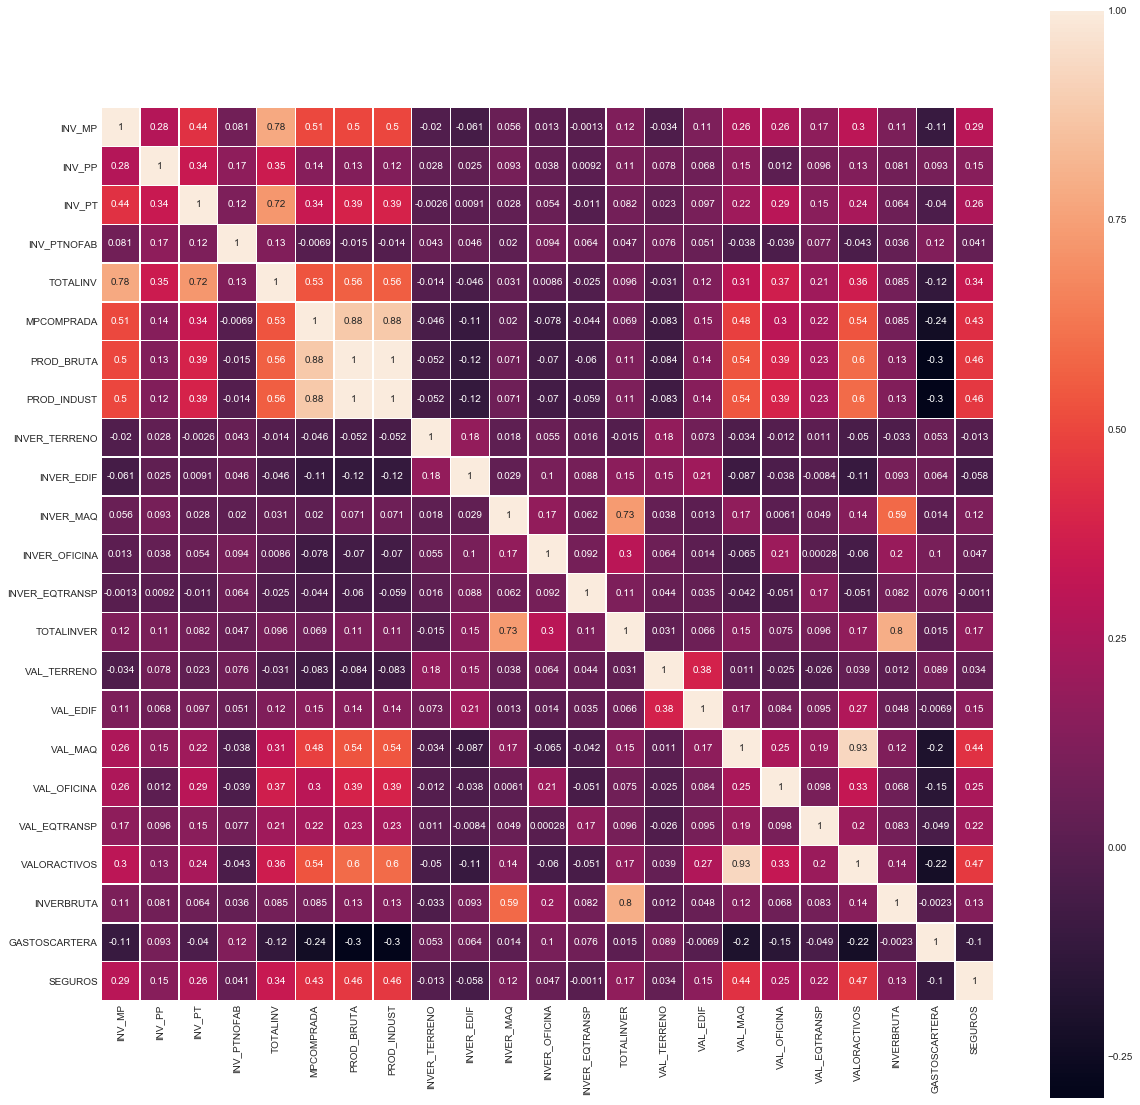

In [10]:
#Matriz de covarianzas
plt.subplots(figsize=(20,20))
sns.heatmap(x.corr(), square=True, annot=True, linewidths =0.4)

4.Cálculo de los valores propios

In [11]:
#KAREN da el mismo resultado utilizando CorMat o utilizando x.corr
eigen_value, eigen_vector =np.linalg.eig(x.corr()) 


# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigen_value[i]), eigen_vector[:,i]) for i in range(len(eigen_value))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Valores propios ordenados:')
for i in eig_pairs:
    print(i[0])

Valores propios ordenados:
5.711017886870533
2.5735447243811285
1.8287244694887281
1.5863284861354305
1.1724587852804709
1.119434592626711
1.0320466219665803
0.928417349235462
0.8764150542931864
0.8110147471874765
0.7966269047418929
0.7645010082700988
0.6746738222475894
0.6288356681797551
0.5838677029492524
0.5373886381874599
0.5016354801975427
0.3915653907848035
0.1579246201063471
0.14387189904139422
0.12511178084812594
0.05415496968092473
0.0004393972991149173


In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigen_value[i]), eigen_vector[i]) for i in range(len(eigen_value))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

print('Valores propios ordenados con su vector propio:')
eig_pairs

Valores propios ordenados con su vector propio:


[(5.711017886870533,
  array([-0.2763305 ,  0.02475359,  0.24455166,  0.21724287, -0.00387   ,
         -0.01604479, -0.47606116, -0.03122225,  0.00120386, -0.04338964,
         -0.04156332, -0.03056551, -0.16362163, -0.47522478,  0.00487875,
          0.53004668,  0.10525963, -0.04898189,  0.09927075,  0.04012007,
          0.14079293, -0.07054342,  0.01659325])),
 (2.5735447243811285,
  array([-0.12047946, -0.08878663,  0.35035998,  0.11644477,  0.00453677,
         -0.0226623 , -0.01370522,  0.00341226, -0.0140735 ,  0.28367579,
         -0.32457571,  0.00841416,  0.03226085, -0.1340449 ,  0.31570402,
         -0.23264015, -0.06598743,  0.28648977, -0.51837483,  0.26341413,
         -0.19363421, -0.00583501,  0.14003061])),
 (1.8287244694887281,
  array([-2.35455697e-01,  6.53926001e-03,  3.56549876e-01,  1.99180897e-01,
         -3.44248311e-03, -2.30598722e-02, -3.66601582e-01, -3.45781039e-04,
          9.10348675e-02, -8.31872534e-02, -1.00125648e-01,  4.55503161e-02,
          

In [15]:
Tot = sum(eigen_value)
var_exp = [(i / 23)*100 for i in sorted(eigen_value, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Varianza ordenada:')
var_exp
#Varianza ordenada

Varianza ordenada:


[24.83051255161101,
 11.189324888613603,
 7.950975954298818,
 6.897080374501872,
 5.0976468925237866,
 4.867106924463961,
 4.487159225941653,
 4.036597170588966,
 3.8105002360573326,
 3.526151074728159,
 3.46359523800823,
 3.323917427261299,
 2.9333644445547367,
 2.734068122520674,
 2.5385552302141408,
 2.3364723399454776,
 2.1810238269458377,
 1.7024582208034937,
 0.6866287830710743,
 0.6255299958321487,
 0.5439642645570693,
 0.23545638991706402,
 0.0019104230396300753]

In [16]:
print('Varianza acumulada:')
cum_var_exp

Varianza acumulada:


array([ 24.83051255,  36.01983744,  43.97081339,  50.86789377,
        55.96554066,  60.83264759,  65.31980681,  69.35640398,
        73.16690422,  76.69305529,  80.15665053,  83.48056796,
        86.4139324 ,  89.14800053,  91.68655576,  94.0230281 ,
        96.20405192,  97.90651014,  98.59313893,  99.21866892,
        99.76263319,  99.99808958, 100.        ])

Gráfico de la varianza asociada a cada factor. Se utiliza para determinar cuántos factores deben retenerse. Típicamente el gráfico muestra la clara ruptura entre la pronunciada pendiente de los factores más importantes. 

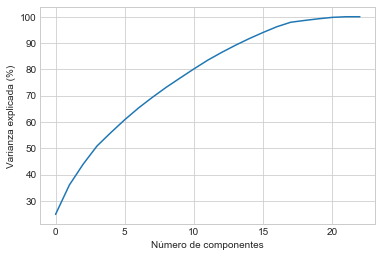

In [17]:
#El nuúmero de componentes esta determinado por el punto donde se encuentra una clara ruptura o punto de inflexión

plt.plot(cum_var_exp,linestyle="-")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada (%)")
plt.show()

#ESTA GRÁFICA ESTA MAL PORQUE LOS VALORES PROPIOS DEBEN ESTAR ORDENADOS DE MAYOR A MENOR

Realizando la gráfica con los valores propios ordenados de mayor a menor se obtiene:

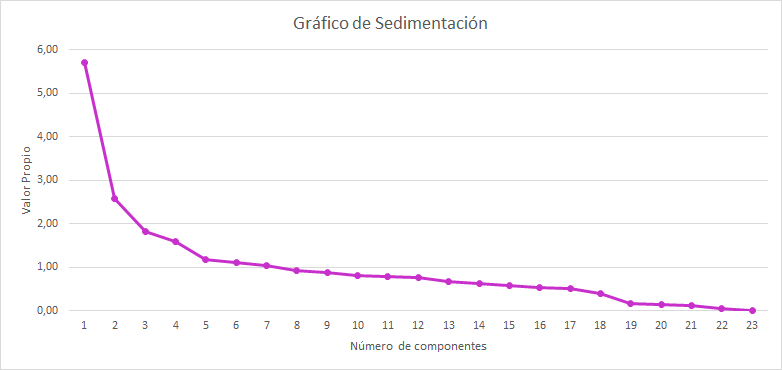

Analizando la gráfica Valor propio vs Número de componentes no hay clara ruptura sin embargo y utilizando el criterio de Kaiser se toman las componentes cuyo valor propio sea mayor o muy cercano a 1 en este caso las 9 primeras componentes que explican el 73.166% de la varianza

En el caso de Python se toman las componentes 1,2,3,4,10,11,12 y 15

In [18]:
M_w=eigen_vector[:,0:9]
Y=X_std.dot(M_w) # Nuevos Y

5.PCA

In [19]:
from sklearn.decomposition import PCA

sklearn_PCA= PCA(n_components=9)
Y_1=sklearn_PCA.fit_transform(X_std)

In [20]:
PCArecursos = pd.DataFrame(data = Y_1, columns = ['COMPONENTE_1_RT','COMPONENTE_2_RT','COMPONENTE_3_RT','COMPONENTE_4_RT','COMPONENTE_5_RT','COMPONENTE_6_RT','COMPONENTE_7_RT','COMPONENTE_8_RT','COMPONENTE_9_RT'])
PCArecursos.head(10295)

,COMPONENTE_1_RT,COMPONENTE_2_RT,COMPONENTE_3_RT,COMPONENTE_4_RT,COMPONENTE_5_RT,COMPONENTE_6_RT,COMPONENTE_7_RT,COMPONENTE_8_RT,COMPONENTE_9_RT
0,0.063044,1.121626,-0.192117,-0.326136,-0.749758,-0.900749,0.369527,-0.990292,0.206256
1,-1.221528,-2.041730,-0.496379,-1.696033,0.236271,2.188561,1.499611,-0.309764,-1.401903
2,-1.022012,-0.609784,0.666385,0.657990,-1.286098,0.278111,-0.996021,0.119801,0.146553
3,-1.160988,0.964162,0.365558,0.837978,-0.762177,-0.148383,0.512404,-0.230755,0.217692
...,...,...,...,...,...,...,...,...,...
10291,-0.441369,-0.090612,1.385255,0.147177,-0.484079,-0.062945,-0.144641,0.151384,0.098374
10292,-0.104650,1.039272,0.334923,-0.866471,-0.519013,-0.284040,-0.347539,-0.596435,0.150268
10293,3.518415,-0.515567,-2.156697,-0.841836,0.312399,-3.685192,-0.418933,0.586925,-1.033319
10294,-0.972062,1.185154,0.304973,-0.840994,0.047575,0.261849,0.336488,-0.552927,-0.167532


In [21]:
ventas=total[['VENTAS']].head(10295)
ventas

,VENTAS
0,3460300.0
1,296411.0
2,1597520.0
3,231480.0
...,...
11635,1100444.0
11636,3300208.0
11637,15443532.0
11638,1180126.0


In [22]:
PCArecursos.reset_index(drop=True, inplace=True) 
ventas.reset_index(drop=True, inplace=True) 
PCA_R = pd.concat([ventas,PCArecursos], axis=1)
PCA_R

,VENTAS,COMPONENTE_1_RT,COMPONENTE_2_RT,COMPONENTE_3_RT,COMPONENTE_4_RT,COMPONENTE_5_RT,COMPONENTE_6_RT,COMPONENTE_7_RT,COMPONENTE_8_RT,COMPONENTE_9_RT
0,3460300.0,0.063044,1.121626,-0.192117,-0.326136,-0.749758,-0.900749,0.369527,-0.990292,0.206256
1,296411.0,-1.221528,-2.041730,-0.496379,-1.696033,0.236271,2.188561,1.499611,-0.309764,-1.401903
2,1597520.0,-1.022012,-0.609784,0.666385,0.657990,-1.286098,0.278111,-0.996021,0.119801,0.146553
3,231480.0,-1.160988,0.964162,0.365558,0.837978,-0.762177,-0.148383,0.512404,-0.230755,0.217692
...,...,...,...,...,...,...,...,...,...,...
10291,1100444.0,-0.441369,-0.090612,1.385255,0.147177,-0.484079,-0.062945,-0.144641,0.151384,0.098374
10292,3300208.0,-0.104650,1.039272,0.334923,-0.866471,-0.519013,-0.284040,-0.347539,-0.596435,0.150268
10293,15443532.0,3.518415,-0.515567,-2.156697,-0.841836,0.312399,-3.685192,-0.418933,0.586925,-1.033319
10294,1180126.0,-0.972062,1.185154,0.304973,-0.840994,0.047575,0.261849,0.336488,-0.552927,-0.167532


In [23]:
print(sklearn_PCA.explained_variance_ratio_) 

[0.24830513 0.11189325 0.07950976 0.0689708  0.05097647 0.04867107
 0.04487159 0.04036595 0.038105  ]


In [24]:
# Para guardar el Dataframe se utiliza la función to_excel y se especifíca el nombre del archivo

PCA_R.to_excel("PCA_RecursosTangibles.xlsx")